In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import time
from datetime import datetime 
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
np.random.seed(2)

In [3]:
os.listdir('.')

['.ipynb_checkpoints',
 'Intro_To_Stats_Ch_3.ipynb',
 'Intro_To_Stats_Ch_4.ipynb',
 'Intro_To_Stats_Ch_5.ipynb',
 'Intro_To_Stats_Ch_6.ipynb',
 'Intro_To_Stats_Ch_7.ipynb',
 'Intro_To_Stats_Ch_8.ipynb',
 'Intro_To_Stats_Ch_9.ipynb']

In [4]:
df = pd.read_csv('../Data/boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


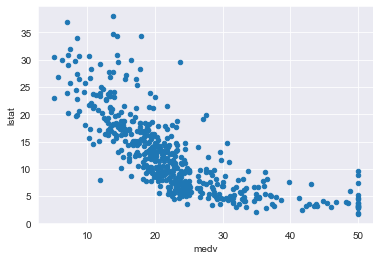

In [5]:
df.plot(x='medv', y='lstat', kind='scatter')

## Sklearn Linear Regression (Minimal Output)

In [6]:
from sklearn.linear_model import LinearRegression

X = df['medv'].values
y = df['lstat'].values

X = X.reshape(df.shape[0], 1)
y = y.reshape(df.shape[0], 1)

reg = LinearRegression().fit(X,y)

In [7]:
print('R2: {}'.format(reg.score(X,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.5441462975864798
Coefficients: [[-0.57275582]]
Intercept: [25.55885923]


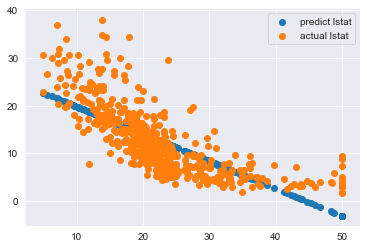

In [8]:
# predicted vs actual values
plt.scatter(x=X, y=reg.predict(X), label='predict lstat')
plt.scatter(x=X, y=y, label='actual lstat')
plt.legend()

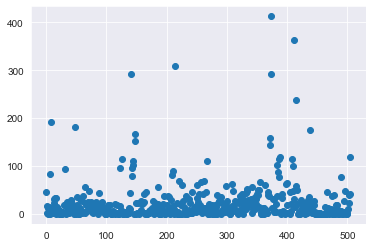

In [9]:
# squared residuals plot
plt.scatter(x=df.index, y=(reg.predict(X) - y)**2)

## OLS Linear Regression (detailed output)

In [10]:
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

# statsmodels doesn't include a constant by default
# sklearn.Linear_Regression DOES include a constant by default
X_ols = add_constant(X)
OLS(y,X).fit().summary()

C:\Users\Alex\Miniconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Fri, 06 Sep 2019   Prob (F-statistic):                    2.71e-67
Time:                        09:52:35   Log-Likelihood:                         -1921.4
No. Observations:                 506   AIC:                                      3845.
Df Residuals:                     505   BIC:                                      3849.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3998      0.020     20.271      0.000       0.361       0.439
==============================================================================
Omnibus:                        9.134   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.422
Skew:                           0.331   Prob(JB):                      0.00900
Kurtosis:                       2.907   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Squared Variable Prediction

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df['medv'].values
y = df['lstat'].values

X = X.reshape(df.shape[0], 1)
y = y.reshape(df.shape[0], 1)

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

reg = LinearRegression().fit(X_,y)

In [12]:
print('R2: {}'.format(reg.score(X_,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.678862281359654
Coefficients: [[ 0.         -1.71502726  0.02068709]]
Intercept: [39.04764268]


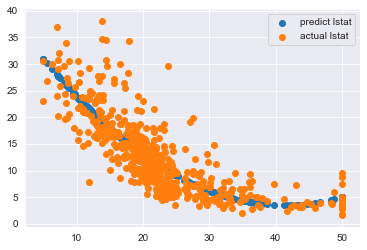

In [13]:
# predicted vs actual values
plt.scatter(x=X, y=reg.predict(X_), label='predict lstat')
plt.scatter(x=X, y=y, label='actual lstat')
plt.legend()

## ^9 Variable Prediction

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df['medv'].values
y = df['lstat'].values

X = X.reshape(df.shape[0], 1)
y = y.reshape(df.shape[0], 1)

poly = PolynomialFeatures(degree=9)
X_ = poly.fit_transform(X)

reg = LinearRegression().fit(X_,y)

In [15]:
print('R2: {}'.format(reg.score(X_,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.6886040945592046
Coefficients: [[ 0.00000000e+00 -2.19547940e-01 -1.01059895e+00  2.07618664e-01
  -1.97519039e-02  1.03779144e-03 -3.19039971e-05  5.72384486e-07
  -5.55821241e-09  2.25953300e-11]]
Intercept: [39.78774821]


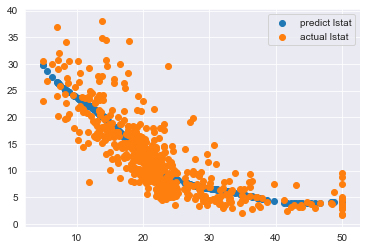

In [16]:
# predicted vs actual values
plt.scatter(x=X, y=reg.predict(X_), label='predict lstat')
plt.scatter(x=X, y=y, label='actual lstat')
plt.legend()

## Log Transformation

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.log(df['medv'].values)
y = df['lstat'].values

X = X.reshape(df.shape[0], 1)
y = y.reshape(df.shape[0], 1)

reg = LinearRegression().fit(X,y)

In [18]:
print('R2: {}'.format(reg.score(X,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.6480799374211881
Coefficients: [[-14.06410236]]
Intercept: [55.33076291]


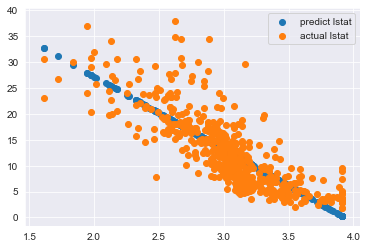

In [19]:
# predicted vs actual values
plt.scatter(x=X, y=reg.predict(X), label='predict lstat')
plt.scatter(x=X, y=y, label='actual lstat')
plt.legend()

## Qualitative Predictors

In [20]:
df2 = pd.read_csv('../Data/Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [21]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['ShelveLoc', 'Urban', 'US']

for col in cat_cols:
    lb_make = LabelEncoder()
    df2[col + '_cat'] = lb_make.fit_transform(df2[col])
    df2.drop(col, axis=1, inplace=True)  

In [22]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_cat,Urban_cat,US_cat
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,1
2,10.06,113,35,10,269,80,59,12,2,1,1
3,7.40,117,100,4,466,97,55,14,2,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_cols = list(df2.columns)
X_cols.remove('Sales')

X = df2[X_cols]
y = df2['Sales']

# X = X.reshape(df.shape[0], 1)
# y = y.reshape(df.shape[0], 1)

reg = LinearRegression().fit(X, y)

In [24]:
print('R2: {}'.format(reg.score(X,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.5735819887271771
Coefficients: [ 9.35142501e-02  1.41489784e-02  1.29408320e-01  2.58441570e-05
 -9.26084174e-02 -4.66504178e-02 -3.91003406e-02  6.03939059e-01
 -8.00397716e-02 -3.54394096e-03]
Intercept: 6.99614622995159


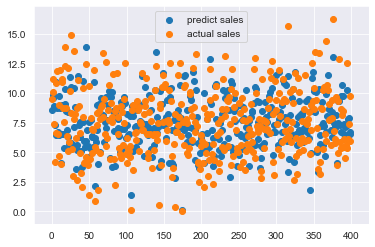

In [25]:
# predicted vs actual values
plt.scatter(x=df2.index, y=reg.predict(X), label='predict sales')
plt.scatter(x=df2.index, y=y, label='actual sales')
plt.legend()

## #8

In [26]:
df3 = pd.read_csv('../Data/auto.csv')
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [27]:
from sklearn.linear_model import LinearRegression

X = df3['horsepower'].values
y = df3['mpg'].values

X = X.reshape(df3.shape[0], 1)
y = y.reshape(df3.shape[0], 1)

reg = LinearRegression().fit(X,y)

In [28]:
print('R2: {}'.format(reg.score(X,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.6059482578894348
Coefficients: [[-0.15784473]]
Intercept: [39.93586102]


In [29]:
# predict mpg for 98 horsepower
reg.predict(np.array([98]).reshape(1,1))

array([[24.46707715]])

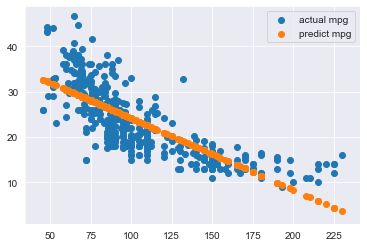

In [30]:
plt.scatter(x=X, y=y, label='actual mpg')
plt.scatter(x=X, y=reg.predict(X), label='predict mpg')
plt.legend()

## #8.c polynomial fit

In [31]:
## ploynomial fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df3['horsepower'].values
y = df3['mpg'].values

X = X.reshape(df3.shape[0], 1)
y = y.reshape(df3.shape[0], 1)

poly = PolynomialFeatures(degree=9)
X_ = poly.fit_transform(X)

reg = LinearRegression().fit(X_,y)

In [32]:
print('R2: {}'.format(reg.score(X_,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.6941655515679699
Coefficients: [[ 0.00000000e+00 -1.72059713e-08 -1.48968359e-09 -7.47703635e-08
  -2.04673761e-06  4.13722372e-08 -3.45654894e-10  1.46804697e-12
  -3.14423697e-15  2.71049180e-18]]
Intercept: [40.63911992]


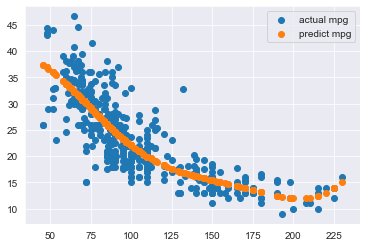

In [33]:
plt.scatter(x=X, y=y, label='actual mpg')
plt.scatter(x=X, y=reg.predict(X_), label='predict mpg')
plt.legend()

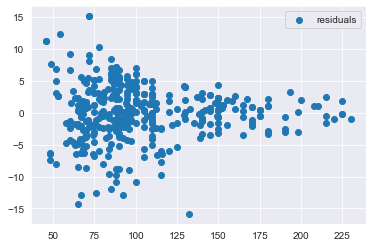

In [34]:
#heteroskedastic errors
plt.scatter(x=X, y=(reg.predict(X_) - y), label='residuals')
plt.legend()

## #9

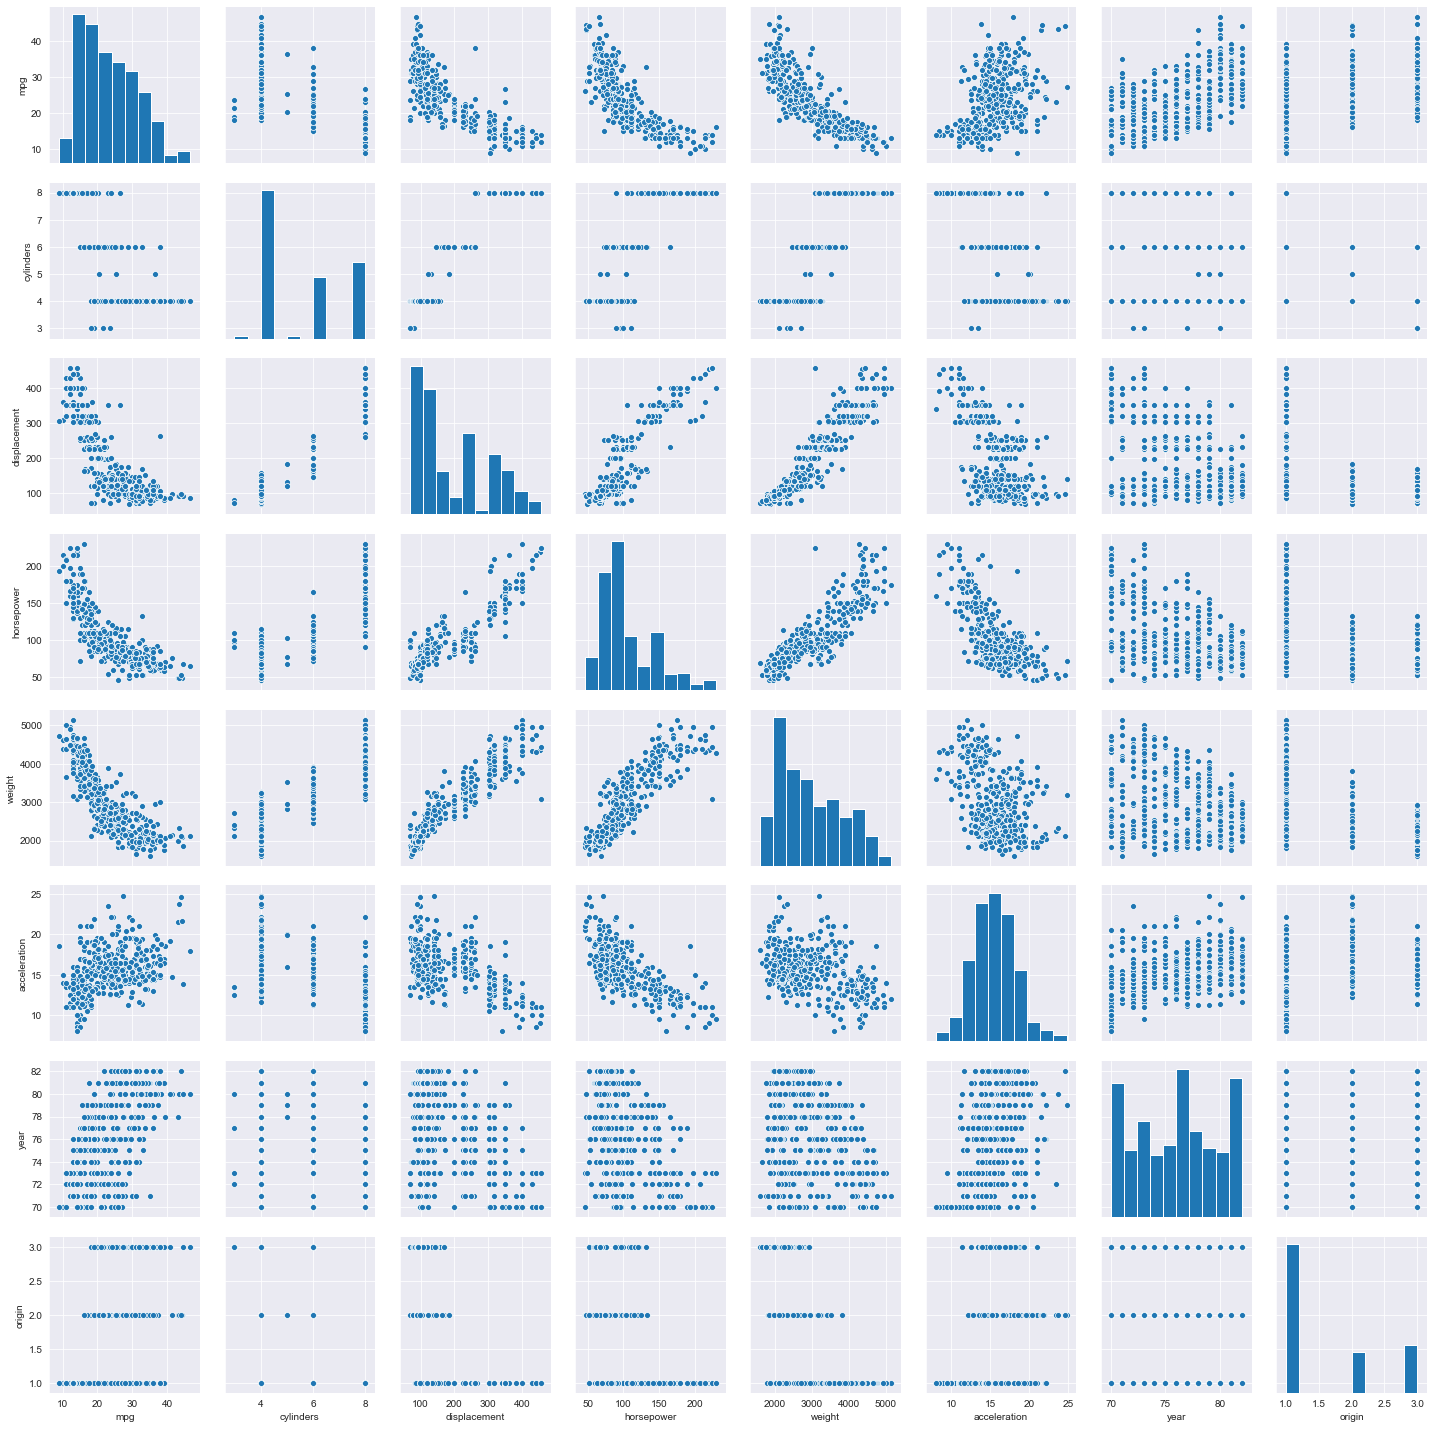

In [35]:
sns.pairplot(df3)

In [36]:
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1,0.95,0.84,0.9,-0.5,-0.35,-0.57
displacement,-0.81,0.95,1,0.9,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.9,1,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.9,0.93,0.86,1,-0.42,-0.31,-0.59
acceleration,0.42,-0.5,-0.54,-0.69,-0.42,1,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1


In [37]:
from sklearn.linear_model import LinearRegression

X_cols = list(df3.columns)
X_cols.remove('name')
X_cols.remove('mpg')

X = df3[X_cols].values
y = df3['mpg'].values

X = X.reshape(df3.shape[0], len(X_cols))
y = y.reshape(df3.shape[0], 1)

reg = LinearRegression().fit(X,y)

In [38]:
print('R2: {}'.format(reg.score(X,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.8214780764810597
Coefficients: [[-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
   1.4261405 ]]
Intercept: [-17.21843462]


In [39]:
X_cols

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

In [40]:
from statsmodels.tools.tools import add_constant
X_ols = add_constant(X)
OLS(y, X_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 06 Sep 2019   Prob (F-statistic):          2.04e-139
Time:                        09:52:54   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2184      4.644     -3.707      0.000     -26.350      -8.087
x1            -0.4934      0.323     -1.526      0.128      -1.129       0.142
x2             0.0199      0.008      2.647      0.008       0.005       0.035
x3            -0.0170      0.014     -1.230      0.220      -0.044       0.010
x4            -0.0065      0.001     -9.929      0.000      -0.008      -0.005
x5             0.0806      0.099      0.815      0.415      -0.114       0.275
x6             0.7508      0.051     14.729      0.000       0.651       0.851
x7             1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

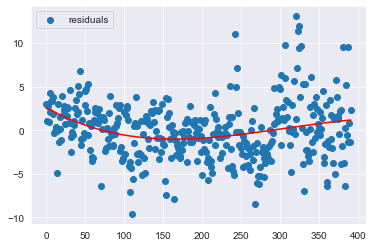

In [41]:
# trend in residuals
y_ = np.squeeze(y - reg.predict(X))
X_ = np.squeeze(list(df3.index))
plt.scatter(x=X_, y=y_, label='residuals')
plt.plot(np.unique(X_), np.poly1d(np.polyfit(X_, y_, 3))(np.unique(X_)), color='r')
plt.legend()

### #9.e

R2: 0.8214780764810597


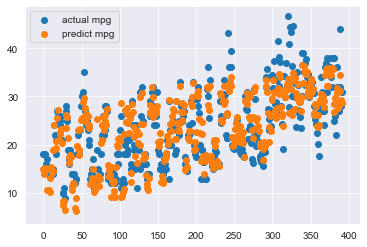

In [42]:
# normal plot
plt.scatter(x=df3.index, y=y, label='actual mpg')
plt.scatter(x=df3.index, y=reg.predict(X), label='predict mpg')
plt.legend()

print('R2: {}'.format(reg.score(X,y)))

R2: 0.8478270646380945


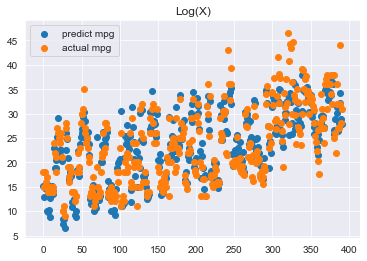

In [43]:
# log plot
X_ = np.log1p(X)
reg = LinearRegression().fit(X_,y)

plt.scatter(x=df3.index, y=reg.predict(X_), label='predict mpg')
plt.scatter(x=df3.index, y=y, label='actual mpg')
plt.legend()
plt.title('Log(X)')

print('R2: {}'.format(reg.score(X_,y)))

R2: 0.8338483791917869


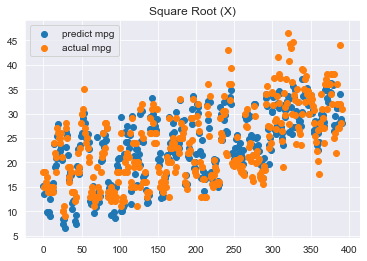

In [44]:
# Square Root plot
X_ = np.sqrt(X)
reg = LinearRegression().fit(X_,y)

plt.scatter(x=df3.index, y=reg.predict(X_), label='predict mpg')
plt.scatter(x=df3.index, y=y, label='actual mpg')
plt.legend()
plt.title('Square Root (X)')

print('R2: {}'.format(reg.score(X_,y)))

R2: 0.7980685272523484


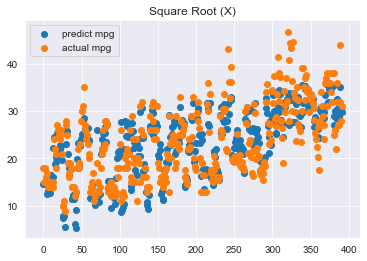

In [45]:
# X^2 plot
X_ = np.square(X)
reg = LinearRegression().fit(X_,y)

plt.scatter(x=df3.index, y=reg.predict(X_), label='predict mpg')
plt.scatter(x=df3.index, y=y, label='actual mpg')
plt.legend()
plt.title('Square Root (X)')

print('R2: {}'.format(reg.score(X_,y)))

## #10

In [46]:
df4 = pd.read_csv('../Data/carseats.csv')
df4.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [47]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Urban', 'US']

for col in cat_cols:
    lb_make = LabelEncoder()
    df4[col + '_cat'] = lb_make.fit_transform(df4[col])
    df4.drop(col, axis=1, inplace=True)  
    
df4.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_cat,US_cat
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [48]:
from sklearn.linear_model import LinearRegression

X = df4[['Price', 'Urban_cat', 'US_cat']].values
y = df4['Sales'].values

reg = LinearRegression().fit(X,y)

In [49]:
print('R2: {}'.format(reg.score(X,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.23927539218405547
Coefficients: [-0.05445885 -0.02191615  1.2005727 ]
Intercept: 13.043468936764896


In [50]:
# have to add constant to OLS b/c sklearn.Linear_Regression includes one, OLS doesn't
from statsmodels.tools.tools import add_constant
X_ols = add_constant(X)
OLS(y, X_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           2.39e-23
Time:                        09:52:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
x1            -0.0545      0.005    -10.389      0.000      -0.065      -0.044
x2            -0.0219      0.272     -0.081      0.936      -0.556       0.512
x3             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### #10.e

In [51]:
X = df4[['Price']].values
y = df4['Sales'].values

X = X.reshape(df4.shape[0], 1)

reg = LinearRegression().fit(X,y)
print('R2: {}'.format(reg.score(X,y)))

R2: 0.19798115021119478


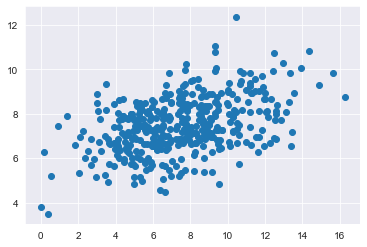

In [52]:
plt.scatter(x=df4['Sales'], y=reg.predict(X))

## #13

(array([10., 15., 39., 27.,  9.]),
 array([-2.65944946, -1.66911796, -0.67878647,  0.31154503,  1.30187652,
         2.29220801]),
 <a list of 5 Patch objects>)

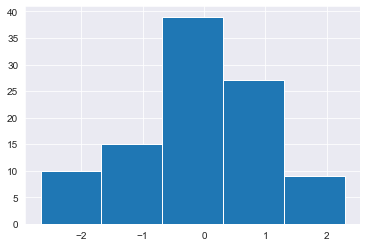

In [53]:
np.random.seed(2)
X = np.random.normal(loc=0, scale=1, size=100)
plt.hist(X, bins=5)

(array([10., 15., 39., 27.,  9.]),
 array([-2.65944946, -1.66911796, -0.67878647,  0.31154503,  1.30187652,
         2.29220801]),
 <a list of 5 Patch objects>)

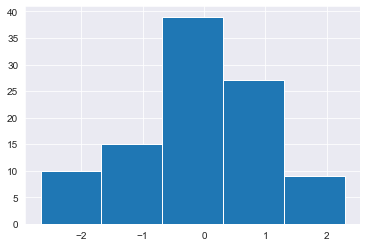

In [54]:
np.random.seed(2)
epsilon = np.random.normal(loc=0, scale=0.1, size=100)
plt.hist(X, bins=5)

(array([10., 15., 39., 27.,  9.]),
 array([-2.59566967, -2.00147078, -1.40727188, -0.81307298, -0.21887409,
         0.37532481]),
 <a list of 5 Patch objects>)

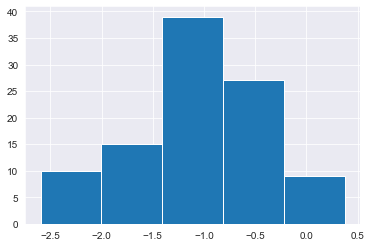

In [55]:
y = -1 + 0.5 * X + epsilon
plt.hist(y, bins=5)

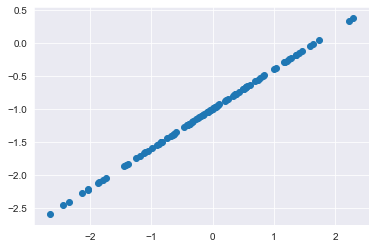

In [56]:
plt.scatter(X, y)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = X.reshape(100, 1)
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

reg = LinearRegression().fit(X, y)
reg_ = LinearRegression().fit(X_, y)

In [58]:
print('R2 (X): {}'.format(reg.score(X,y)))
print('R2 (X^2): {}'.format(reg_.score(X_,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2 (X): 1.0
R2 (X^2): 1.0
Coefficients: [0.6]
Intercept: -1.0


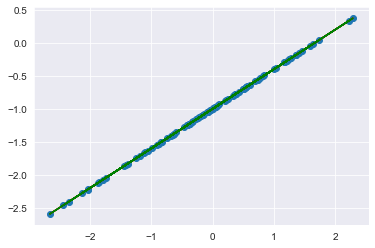

In [59]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='r')
plt.plot(X, reg_.predict(X_), color='g')